In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import seaborn as sns; sns.set()

import networkx as nx
from pyvis.network import Network

# Data Wrangling
I want to figure out where Islamaphobic tweets are originating from (which tweets, users, etc) as well as what factors contribute to responses to these tweets.

The given dataset comes with  a lot of excess columns so I will try to extract the relevant data.

In [2]:
df = pd.read_csv('./noislamophobia-dataset-75k.csv')
df.head()

,_id,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,...,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,full_text,truncated,user,withheld_in_countries
0,ObjectId(59dbede4e6e465a2d67a1062),NaN,NaN,Sun Oct 22 10:34:06 +0000 2017,"{""hashtags"":[{""text"":""BanIslam"",""indices"":[93,...",NaN,0,False,NaN,9.220484e+17,...,NaN,4,False,"{""created_at"":""Fri Oct 20 09:33:45 +0000 2017""...","<a href=""http://twitter.com/download/iphone"" r...",RT @Private34349909: @AmyMek @Dab7One 1/ @real...,NaN,False,"{""id"":8.009259051368776e+17,""id_str"":""80092590...",NaN
1,ObjectId(59dbede4e6e465a2d67a1068),NaN,NaN,Sun Oct 22 08:50:43 +0000 2017,"{""hashtags"":[{""text"":""RT"",""indices"":[38,41]},{...",NaN,0,False,NaN,9.220224e+17,...,NaN,9,False,"{""created_at"":""Sun Oct 22 00:40:33 +0000 2017""...","<a href=""http://twitter.com/#!/download/ipad"" ...",RT @PoliticalIslam: Educate yourself! #RT http...,NaN,False,"{""id"":42565769,""id_str"":""42565769"",""name"":""Epi...","[""DE""]"
2,ObjectId(59dbede4e6e465a2d67a1079),NaN,NaN,Sun Oct 22 10:28:09 +0000 2017,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",NaN,0,False,NaN,9.220469e+17,...,9.216456e+17,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Say, @CanadianPM @JustinTrudeau @liberal_party...",NaN,True,"{""id"":1461022464,""id_str"":""1461022464"",""name"":...",NaN
3,ObjectId(59dbee5ce6e465a2d67a16b7),NaN,NaN,Sun Oct 22 10:12:59 +0000 2017,"{""hashtags"":[{""text"":""BanTippuJayanti"",""indice...",NaN,0,False,NaN,9.220431e+17,...,7.951297e+17,3,False,"{""created_at"":""Sun Nov 06 06:56:48 +0000 2016""...","<a href=""http://twitter.com/download/iphone"" r...",RT @ensine: Another reason KHANgressi govt mus...,NaN,False,"{""id"":142379064,""id_str"":""142379064"",""name"":""ॐ...",NaN
4,ObjectId(59dbee5ce6e465a2d67a16be),NaN,NaN,Sun Oct 22 10:35:20 +0000 2017,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",NaN,0,False,NaN,9.220487e+17,...,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@NathanHensley19 @davidholman82 @barry206 @Sky...,NaN,True,"{""id"":8.88537147011158e+17,""id_str"":""888537147...",NaN


In [3]:
df.columns

Index(['_id', 'contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text', 'full_text', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')

In [4]:
df[['user', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id_str']]

,user,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id_str
0,"{""id"":8.009259051368776e+17,""id_str"":""80092590...",NaN,NaN,NaN
1,"{""id"":42565769,""id_str"":""42565769"",""name"":""Epi...",NaN,NaN,NaN
2,"{""id"":1461022464,""id_str"":""1461022464"",""name"":...",NaN,NaN,NaN
3,"{""id"":142379064,""id_str"":""142379064"",""name"":""ॐ...",NaN,NaN,NaN
4,"{""id"":8.88537147011158e+17,""id_str"":""888537147...",NathanHensley19,9.218437e+17,8.691169e+17
...,...,...,...,...
75128,"{""id"":9.41763230644523e+17,""id_str"":""941763230...",NaN,NaN,NaN
75129,"{""id"":427370852,""id_str"":""427370852"",""name"":""J...",NaN,NaN,NaN
75130,"{""id"":2.392458824e+09,""id_str"":""2392458824"",""n...",NaN,NaN,NaN
75131,"{""id"":721263993,""id_str"":""721263993"",""name"":""H...",NaN,NaN,NaN


In [5]:
df.in_reply_to_screen_name.notna().sum()

7262

In [6]:
# Get a username column
df.user[0]

'{"id":8.009259051368776e+17,"id_str":"800925905136877569","name":"Cl_USARocks 🇺🇸","screen_name":"usarocks_c","location":"United States","description":"Grateful 4 Trump fam! Support Trump 100%! Thank U Vets, Police, BP \\u0026 All Who Protect Us!🙏🏻 I stand!🇺🇸 #MAGA🚫NFL 🚫Islam 🚫Sharia Law 🚫No Flirt DM’s👈🏻","url":"https://t.co/LiQOFDfZgS","entities":{"url":{"urls":[{"url":"https://t.co/LiQOFDfZgS","expanded_url":"http://www.Happily.Married.2.Vet","display_url":"Happily.Married.2.Vet","indices":[0,23]}]},"description":{"urls":[]}},"protected":false,"followers_count":10789,"friends_count":10761,"listed_count":21,"created_at":"Tue Nov 22 04:56:31 +0000 2016","favourites_count":21130,"utc_offset":null,"time_zone":null,"geo_enabled":false,"verified":false,"statuses_count":14405,"lang":"en","contributors_enabled":false,"is_translator":false,"is_translation_enabled":false,"profile_background_color":"F5F8FA","profile_background_image_url":null,"profile_background_image_url_https":null,"profile_b

In [7]:
origin = df[['user', 'in_reply_to_screen_name', 'retweet_count', 'retweeted', 'created_at', 'text']]
origin.head()

,user,in_reply_to_screen_name,retweet_count,retweeted,created_at,text
0,"{""id"":8.009259051368776e+17,""id_str"":""80092590...",NaN,4,False,Sun Oct 22 10:34:06 +0000 2017,RT @Private34349909: @AmyMek @Dab7One 1/ @real...
1,"{""id"":42565769,""id_str"":""42565769"",""name"":""Epi...",NaN,9,False,Sun Oct 22 08:50:43 +0000 2017,RT @PoliticalIslam: Educate yourself! #RT http...
2,"{""id"":1461022464,""id_str"":""1461022464"",""name"":...",NaN,0,False,Sun Oct 22 10:28:09 +0000 2017,"Say, @CanadianPM @JustinTrudeau @liberal_party..."
3,"{""id"":142379064,""id_str"":""142379064"",""name"":""ॐ...",NaN,3,False,Sun Oct 22 10:12:59 +0000 2017,RT @ensine: Another reason KHANgressi govt mus...
4,"{""id"":8.88537147011158e+17,""id_str"":""888537147...",NathanHensley19,0,False,Sun Oct 22 10:35:20 +0000 2017,@NathanHensley19 @davidholman82 @barry206 @Sky...


In [8]:
# want to get username, user_id_str, followers_count, verified out of 'user'
user_df = origin.user.apply(json.loads).apply(pd.Series)
user_df.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,8.009259e+17,800925905136877569,Cl_USARocks 🇺🇸,usarocks_c,United States,Grateful 4 Trump fam! Support Trump 100%! Than...,https://t.co/LiQOFDfZgS,{'url': {'urls': [{'url': 'https://t.co/LiQOFD...,False,10789,...,333333,True,False,True,False,False,False,False,none,NaN
1,4.256577e+07,42565769,Epicurist,Demontialto,Australia,"Atheist, Free thinker hopefully. RT not necess...",None,{'description': {'urls': []}},False,623,...,000000,False,False,False,False,False,False,False,none,NaN
2,1.461022e+09,1461022464,Steers Mann,SteersMann,"BC, Canada",Retired electronics technologist; proponent of...,None,{'description': {'urls': [{'url': 'https://t.c...,False,787,...,333333,True,False,True,False,False,False,False,none,NaN
3,1.423791e+08,142379064,ॐ भारत ॐ,_dharam_vir,हिन्दू राष्ट्र भारत,धृति: क्षमा दमोऽस्‍तेयं शौचमिन्‍द्रियनिग्रह: ।...,https://t.co/P8k1D0FqWN,{'url': {'urls': [{'url': 'https://t.co/P8k1D0...,False,21211,...,333333,True,False,False,False,False,False,False,none,NaN
4,8.885371e+17,888537147011158017,Guy Fawkes,Anonymo95592895,,,None,{'description': {'urls': []}},False,29,...,333333,True,False,True,False,False,False,False,none,NaN


In [9]:
user_df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'entities', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_image_url', 'profile_image_url_https', 'profile_banner_url',
       'profile_link_color', 'profile_sidebar_border_color',
       'profile_sidebar_fill_color', 'profile_text_color',
       'profile_use_background_image', 'has_extended_profile',
       'default_profile', 'default_profile_image', 'following',
       'follow_request_sent', 'notifications', 'translator_type',
       'withheld_in_countries'],
      dtype='object')

In [10]:
origin['id_str'] = user_df.id_str
origin['username'] = user_df.screen_name
origin['followers_count'] = user_df.followers_count
origin['verified'] = user_df.verified
origin = origin[['username', 'id_str', 'followers_count', 'verified', 'in_reply_to_screen_name', 'retweet_count', 'retweeted', 'text', 'created_at']]
origin.head()

,username,id_str,followers_count,verified,in_reply_to_screen_name,retweet_count,retweeted,text,created_at
0,usarocks_c,800925905136877569,10789,False,NaN,4,False,RT @Private34349909: @AmyMek @Dab7One 1/ @real...,Sun Oct 22 10:34:06 +0000 2017
1,Demontialto,42565769,623,False,NaN,9,False,RT @PoliticalIslam: Educate yourself! #RT http...,Sun Oct 22 08:50:43 +0000 2017
2,SteersMann,1461022464,787,False,NaN,0,False,"Say, @CanadianPM @JustinTrudeau @liberal_party...",Sun Oct 22 10:28:09 +0000 2017
3,_dharam_vir,142379064,21211,False,NaN,3,False,RT @ensine: Another reason KHANgressi govt mus...,Sun Oct 22 10:12:59 +0000 2017
4,Anonymo95592895,888537147011158017,29,False,NathanHensley19,0,False,@NathanHensley19 @davidholman82 @barry206 @Sky...,Sun Oct 22 10:35:20 +0000 2017


In [11]:
# The retweeted column is always false, so recalculate it
origin.retweeted = origin.text.str.startswith('RT')
print(f'Number of tweets that are RTs: {origin.retweeted.sum()}')

# created_at column is not of type datetime
origin.created_at = pd.to_datetime(origin.created_at)

origin[origin.retweeted].head()

Number of tweets that are RTs: 57505


,username,id_str,followers_count,verified,in_reply_to_screen_name,retweet_count,retweeted,text,created_at
0,usarocks_c,800925905136877569,10789,False,NaN,4,True,RT @Private34349909: @AmyMek @Dab7One 1/ @real...,2017-10-22 10:34:06+00:00
1,Demontialto,42565769,623,False,NaN,9,True,RT @PoliticalIslam: Educate yourself! #RT http...,2017-10-22 08:50:43+00:00
3,_dharam_vir,142379064,21211,False,NaN,3,True,RT @ensine: Another reason KHANgressi govt mus...,2017-10-22 10:12:59+00:00
5,IFoundThatThis,2835196635,12,False,NaN,46,True,RT @Anni_Cyrus: 963 under 10 yr child brides i...,2017-10-22 08:11:44+00:00
6,SithJeep,2180717723,1143,False,NaN,46,True,RT @Anni_Cyrus: 963 under 10 yr child brides i...,2017-10-22 10:20:06+00:00


# Data Exploration
I now have the dataframe origin which has the username and some potential measures for how popular the user is and how much "penetration potential" their tweets have.

Will now begin to explore the data.

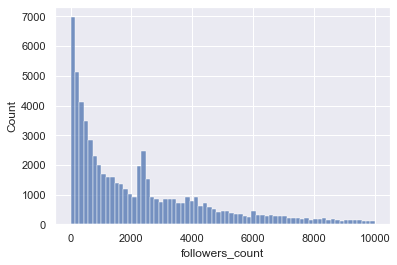

In [12]:
sns.histplot(data=origin, x='followers_count', binrange=(0, 10000))

In [13]:
origin[origin.verified]

,username,id_str,followers_count,verified,in_reply_to_screen_name,retweet_count,retweeted,text,created_at
4380,se4realhinton,313454492,47640,True,NaN,58,True,RT @DoraDoubleDD: Let’s first see if the dude ...,2017-11-05 22:02:31+00:00
6007,raistolo,526837239,5207,True,NaN,12,True,RT @chedisagio: Ricordate questa foto?\ne l'ha...,2017-11-14 13:38:58+00:00
9456,FDW_VB,142646856,18357,True,NaN,11,False,Antwerpse #VlaamsBelang parlementsleden plakke...,2017-12-04 12:15:09+00:00
9881,jjauthor,177584156,171831,True,NaN,12,True,RT @khalifallah: I'm an #ExMuslimBecause civil...,2017-12-07 04:14:36+00:00
12007,Shastina_Eloff,26183714,139795,True,NaN,8,True,RT @InTheYear1611_: @Lovin2Laugh A few things ...,2017-12-18 02:46:18+00:00
18085,medenix,202762476,2182,True,NaN,1,True,"RT @vlwigg: ""I find this disgraceful post abho...",2018-02-14 22:06:53+00:00
18091,NanetteLight,44390647,647,True,NaN,6,True,"RT @vlwigg: ""I find this disgraceful post abho...",2018-02-14 22:34:58+00:00
18114,disolis,15996671,4787,True,NaN,8,True,RT @omarsuleiman504: Grateful to Plano Mayor H...,2018-02-15 02:43:12+00:00
20062,itsYourGrace,570567264,4385,True,NaN,407,True,RT @WayneDupreeShow: This Sheriff should share...,2018-03-08 16:13:38+00:00
23807,AliceOllstein,55790584,15113,True,NaN,103,True,RT @KFILE: NEW: Political appointee at HHS sha...,2018-04-13 20:12:09+00:00


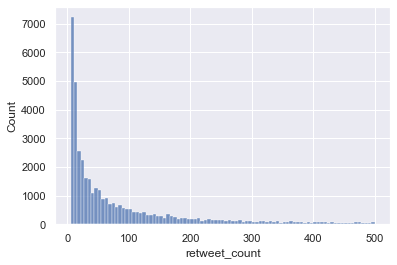

In [14]:
# I excludes tweets with < 5 retweets since they are a clear majority and mess up the scale of the graph
sns.histplot(data=origin, x='retweet_count', binrange=(5, 500))

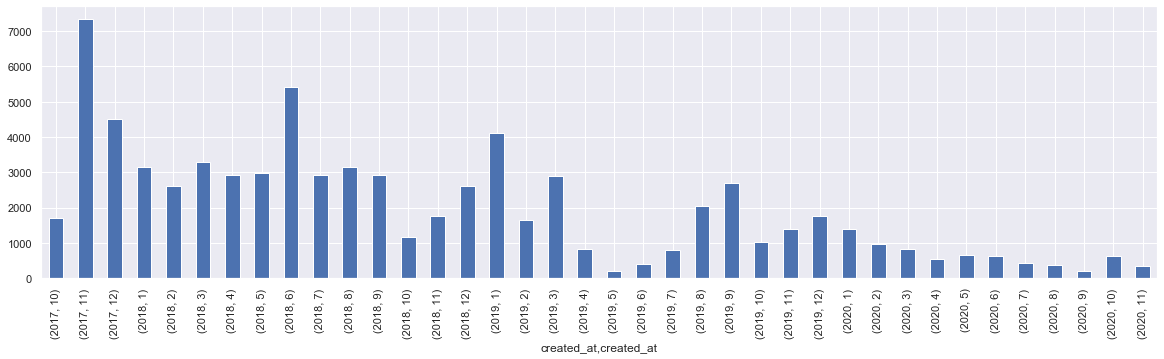

In [15]:
origin.groupby([origin.created_at.dt.year, origin.created_at.dt.month])['username'].count().plot(kind='bar', figsize=(20, 5))

## Initial Conclusions
- Most of the people tweeting in this dataset have very few followers. The distribution of followers is highest at 0 with an exponential dropoff for larger amounts of followers.
- There are very few verified users (around 28). These users obviously have a high amount of followers compared to other users.
- These verified users are retweeted a lot. The retweet_count distribution has an exponential dropoff and all of these verified users have retweet_counts much higher than shown in the retweet_count histogram.
- Verified users also retweet others a lot. This was not properly indicated in the retweeted column, so I recalculated it.
- Most of our tweets come from late 2017 - 2018 with fewer tweets in 2019 and 2020. November 2017 had a particularly high amount of tweets, might be interesting to see why that is.

# Penetration Network
At this point, it seems clear that verified users have much higher Twitter penetration since they are much more involved in the process of retweeting as well as being retweeted. There are not many verified users in this dataset so I will also be looking at users with a high amount of followers (users with a follower count above the 75th percentile). I will try to visualize how tweets from these users spread and what factors influence this spread.

In [16]:
# Get a column that has all the @'d users for that tweet
origin['mentions'] = origin.text.str.split().apply(lambda lst: [(x[1:-1] if x.endswith(':') else x[1:]) for x in filter(lambda x: x.startswith('@'), lst)])
origin.head()

,username,id_str,followers_count,verified,in_reply_to_screen_name,retweet_count,retweeted,text,created_at,mentions
0,usarocks_c,800925905136877569,10789,False,NaN,4,True,RT @Private34349909: @AmyMek @Dab7One 1/ @real...,2017-10-22 10:34:06+00:00,"[Private34349909, AmyMek, Dab7One, realDonaldT..."
1,Demontialto,42565769,623,False,NaN,9,True,RT @PoliticalIslam: Educate yourself! #RT http...,2017-10-22 08:50:43+00:00,"[PoliticalIslam, PoliticalIslam]"
2,SteersMann,1461022464,787,False,NaN,0,False,"Say, @CanadianPM @JustinTrudeau @liberal_party...",2017-10-22 10:28:09+00:00,"[CanadianPM, JustinTrudeau, liberal_party,]"
3,_dharam_vir,142379064,21211,False,NaN,3,True,RT @ensine: Another reason KHANgressi govt mus...,2017-10-22 10:12:59+00:00,[ensine]
4,Anonymo95592895,888537147011158017,29,False,NathanHensley19,0,False,@NathanHensley19 @davidholman82 @barry206 @Sky...,2017-10-22 10:35:20+00:00,"[NathanHensley19, davidholman82, barry206, Sky..."


In [17]:
cols = ['username', 'followers_count', 'retweet_count', 'mentions']
graph_df = origin[cols].groupby('username').agg({'followers_count': 'mean', 'retweet_count': 'sum', 'mentions': 'sum'}).reset_index()
graph_df['scaled_count'] = 1000 + (graph_df.followers_count - graph_df.followers_count.min()) * 5000 / (graph_df.followers_count.max() - graph_df.followers_count.min())
graph_df = graph_df.explode('mentions')

graph_df.username = graph_df.username + '_'
graph_df.mentions = graph_df.mentions + '_'

norm = Normalize(vmin=0, vmax=21, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Reds)
graph_df['colors'] = graph_df.retweet_count.apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))

graph_df.head()

,username,followers_count,retweet_count,mentions,scaled_count,colors
0,0000DD02_,3000.0,3,76rooster_,1020.304220,#fedbcc
1,000_Gopal32_,2410.0,215,Donotshit_,1016.311057,#67000d
2,001Nationalist_,60.0,2,NaN,1000.406084,#fee5d9
3,001_rhonda_,994.0,508,yeatsfeats_,1006.727465,#67000d
3,001_rhonda_,994.0,508,JoeBelsha1_,1006.727465,#67000d


In [18]:
# More red = More retweets, Larger = More followers
nodes = graph_df.head(500).drop_duplicates('username')
mentions = [x for x in graph_df.head(500).mentions.dropna() if x not in nodes.username]
title_col = 'Followers: ' + nodes.followers_count.astype(int).astype(str) + '\nRetweets: ' + nodes.retweet_count.astype(str)

nt = Network(height=800, width='100%', notebook=True)
nt.add_nodes(nodes.username.to_numpy(), title=title_col, value=nodes.scaled_count, color=nodes.colors)
nt.add_nodes(mentions, title=mentions, value=[1000] * len(mentions), color=['#000000'] * len(mentions))
nt.add_edges(graph_df[['username', 'mentions']].head(500).dropna().to_records(index=False))

nt.show('ex.html')